In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 

import sklearn
import sklearn.naive_bayes
from sklearn.model_selection import train_test_split

import pickle
import cv2
from cv2 import cv2

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
x_path = '/content/drive/MyDrive/Data/X.pickle'
y_path = '/content/drive/MyDrive/Data/y.pickle'

X = pickle.load(open(x_path, 'rb'))
y = pickle.load(open(y_path, 'rb'))

CATEGORIES = ['Without Mask', 'Incorrectly Wearing Mask', 'Wearing Mask']

In [4]:
print('Type X:', type(X))
print('Type y:', type(y), end='\n\n')

print('X Shape:', X.shape)
print('y Shape:', y.shape)

Type X: <class 'numpy.ndarray'>
Type y: <class 'numpy.ndarray'>

X Shape: (17529, 64, 64)
y Shape: (17529,)


Random Image from X:



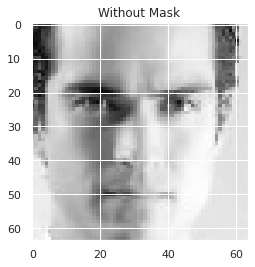

In [5]:
index = 1113
random_img = X[index]
random_img_label = CATEGORIES[y[index]]

print('Random Image from X:')
plt.imshow(random_img, cmap='gray')
plt.title(random_img_label)

print()

In [6]:
# Reshape the size to reduce RAM consumption
reshaped_size = 64
print('Before Reshaping size:', X.shape)

resized_X = []
for img in X:
  resized_X.append(cv2.resize(img, (reshaped_size, reshaped_size)))

X = np.asarray(resized_X)
del resized_X

print('After Reshaping Size: ', X.shape)

Before Reshaping size: (17529, 64, 64)
After Reshaping Size:  (17529, 64, 64)


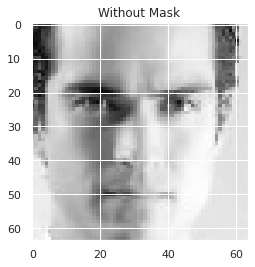

In [7]:
plt.imshow(X[index], cmap='gray')
plt.title(CATEGORIES[y[index]])
print()

In [8]:
# Reshape into 1d for Naive Bayes 
print('Before Reshaping to 1D:', X.shape)
X = X.reshape(-1, reshaped_size*reshaped_size)
print('After Reshaping to 1D: ', X.shape)

Before Reshaping to 1D: (17529, 64, 64)
After Reshaping to 1D:  (17529, 4096)


Double Check: Img still holds after reshape (64, 64)



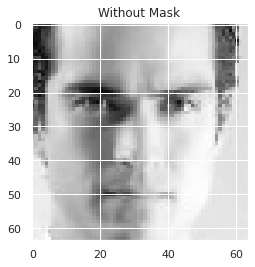

In [9]:
same_img = np.reshape(X[index], (reshaped_size, reshaped_size))
print('Double Check: Img still holds after reshape', same_img.shape)
plt.imshow(same_img, cmap='gray')
plt.title(CATEGORIES[y[index]])
print()

In [10]:
# Normalize the data
X = X / 255.0
print('Domain: [',X.min(),',', X.max(), ']')

Domain: [ 0.0 , 1.0 ]


In [11]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

GaussianNB w/o Hyperparameter tuning

In [25]:
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))

ValueError: ignored

In [12]:
# GaussianNB Building
gaussianNB_model = sklearn.naive_bayes.GaussianNB()

# Training
gaussianNB_model.fit(X_train, y_train)

GaussianNB()

In [26]:
X_train.shape

(14023, 4096)

GaussianNB Metrics

Accuracy: 0.770108

Recall: 0.770108

F1 Score: 0.770108



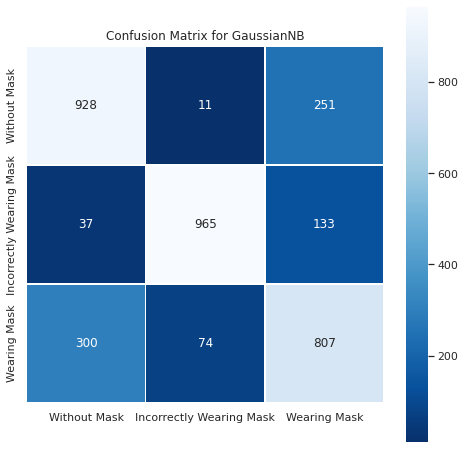

In [13]:
# Evaluation
gnb_y_pred = gaussianNB_model.predict(X_test)

print('GaussianNB Metrics', end='\n\n')
accuracy = sklearn.metrics.accuracy_score(y_test, gnb_y_pred)
print('Accuracy: %f' % accuracy, end='\n\n')

recall = sklearn.metrics.recall_score(y_test, gnb_y_pred, average='micro')
print('Recall: %f' % recall, end='\n\n')

f1_score = sklearn.metrics.f1_score(y_test, gnb_y_pred, average='micro')
print('F1 Score: %f' % f1_score)

cm = sklearn.metrics.confusion_matrix(y_test, gnb_y_pred)
# print('Confusion Matrix:')
# print(cm, end='\n\n')
plt.figure(figsize=(8,8), facecolor='w')
sns.heatmap(cm, annot=True, fmt='d', linewidths=.5, square=True,cmap='Blues_r', yticklabels=CATEGORIES, xticklabels=CATEGORIES)
plt.title('Confusion Matrix for GaussianNB')

print()

MultinomialNB w/o Hyperparameter Tuning

In [14]:
# MultinomialNB Building
multinomialNB_model = sklearn.naive_bayes.MultinomialNB()

In [15]:
# Training
multinomialNB_model.fit(X_train, y_train)

MultinomialNB()

MultinomialNB Metrics

Accuracy: 0.692242

Recall: 0.692242

F1 Score: 0.692242



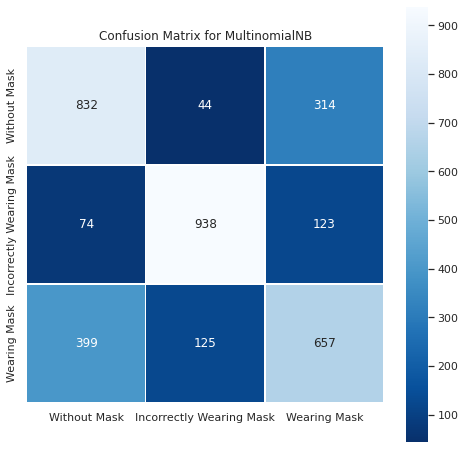

In [16]:
# Evaluate
mnb_y_pred = multinomialNB_model.predict(X_test)

print('MultinomialNB Metrics', end='\n\n')
accuracy = sklearn.metrics.accuracy_score(y_test, mnb_y_pred)
print('Accuracy: %f' % accuracy, end='\n\n')

recall = sklearn.metrics.recall_score(y_test, mnb_y_pred, average='micro')
print('Recall: %f' % recall, end='\n\n')

f1_score = sklearn.metrics.f1_score(y_test, mnb_y_pred, average='micro')
print('F1 Score: %f' % f1_score)

cm = sklearn.metrics.confusion_matrix(y_test, mnb_y_pred)
# print('Confusion Matrix:')
# print(cm, end='\n\n')
plt.figure(figsize=(8,8), facecolor='w')
sns.heatmap(cm, annot=True, fmt='d', linewidths=.5, square=True,cmap='Blues_r', yticklabels=CATEGORIES, xticklabels=CATEGORIES)
plt.title('Confusion Matrix for MultinomialNB')

print()

GaussianNB with Hyperparameter tuning

In [17]:
%%time

# Gridsearch for GaussianNB
params = {
    'var_smoothing' : [1e-09, 1e-07, 1e-05, 1e-03, 1, 100]
}

# Hyperparameter tuning
grid_search_cv = sklearn.model_selection.GridSearchCV(sklearn.naive_bayes.GaussianNB(), param_grid=params, scoring='accuracy', n_jobs=-1)

grid_search_cv.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


CPU times: user 1.2 s, sys: 535 ms, total: 1.73 s
Wall time: 31.4 s


In [18]:
print('Best param for \'var_smoothing\':', grid_search_cv.best_params_)
print('With Accuracy of %f' % grid_search_cv.best_score_)

Best param for 'var_smoothing': {'var_smoothing': 0.001}
With Accuracy of 0.777438


GaussianNB with 'var_smoothing' of 0.001000 Metrics

Accuracy: 0.770394

Recall: 0.770394

F1 Score: 0.770394



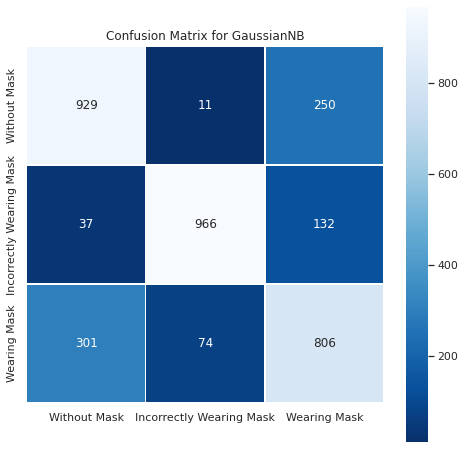

In [19]:
# Grab the best performing model
gnb_model = grid_search_cv.best_estimator_

gnb_gs_y_pred = gnb_model.predict(X_test)

print('GaussianNB with \'var_smoothing\' of %f Metrics' % grid_search_cv.best_params_['var_smoothing'], end='\n\n')
accuracy = sklearn.metrics.accuracy_score(y_test, gnb_gs_y_pred)
print('Accuracy: %f' % accuracy, end='\n\n')

recall = sklearn.metrics.recall_score(y_test, gnb_gs_y_pred, average='micro')
print('Recall: %f' % recall, end='\n\n')

f1_score = sklearn.metrics.f1_score(y_test, gnb_gs_y_pred, average='micro')
print('F1 Score: %f' % f1_score)

cm = sklearn.metrics.confusion_matrix(y_test, gnb_gs_y_pred)
# print('Confusion Matrix:')
# print(cm, end='\n\n')
plt.figure(figsize=(8,8), facecolor='w')
sns.heatmap(cm, annot=True, fmt='d', linewidths=.5, square=True,cmap='Blues_r', yticklabels=CATEGORIES, xticklabels=CATEGORIES)
plt.title('Confusion Matrix for GaussianNB')

print()

MultinomialNB with Hyperparameter tuning

In [20]:
# Hyperparameter tuning for multinomialnb
params = {
    'alpha' : [0.1, 0.5, 1, 2, 5, 100],
}
grid_search_cv = sklearn.model_selection.GridSearchCV(
    sklearn.naive_bayes.MultinomialNB(),
    param_grid=params,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_cv.fit(X_train, y_train)

GridSearchCV(estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1, 2, 5, 100]},
             scoring='accuracy')

In [21]:
print('Best params:', grid_search_cv.best_params_)
print('With Accuracy of %f ' % grid_search_cv.best_score_)

Best params: {'alpha': 100}
With Accuracy of 0.681096 


MultinomialNB with 'alpha' of 100.000000 Metrics

Accuracy: 0.693098

Recall: 0.693098

F1 Score: 0.693098



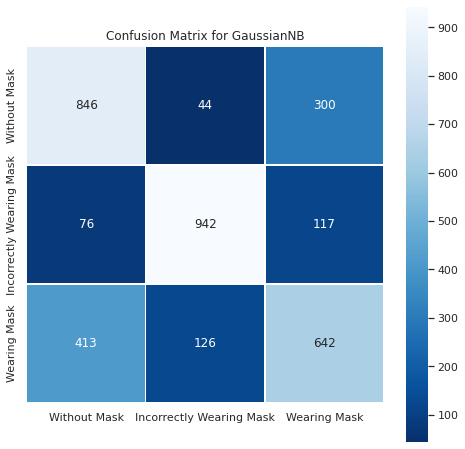

In [22]:
mnb_model = grid_search_cv.best_estimator_

mnb_gs_y_pred = mnb_model.predict(X_test)

print('MultinomialNB with \'alpha\' of %f Metrics' % grid_search_cv.best_params_['alpha'], end='\n\n')
accuracy = sklearn.metrics.accuracy_score(y_test, mnb_gs_y_pred)
print('Accuracy: %f' % accuracy, end='\n\n')

recall = sklearn.metrics.recall_score(y_test, mnb_gs_y_pred, average='micro')
print('Recall: %f' % recall, end='\n\n')

f1_score = sklearn.metrics.f1_score(y_test, mnb_gs_y_pred, average='micro')
print('F1 Score: %f' % f1_score)

cm = sklearn.metrics.confusion_matrix(y_test, mnb_gs_y_pred)
# print('Confusion Matrix:')
# print(cm, end='\n\n')
plt.figure(figsize=(8,8), facecolor='w')
sns.heatmap(cm, annot=True, fmt='d', linewidths=.5, square=True,cmap='Blues_r', yticklabels=CATEGORIES, xticklabels=CATEGORIES)
plt.title('Confusion Matrix for GaussianNB')

print()

In [23]:
from keras.models import load_model
gaussianNB_model.save('NB.h5')

AttributeError: ignored

In [24]:
import pickle

f = open('NB.pickle', 'wb')

pickle.dump(gaussianNB_model, f)

f.close()